In [1]:
from utils import build_W, QuadraticDataset, LogisticDataset, plot_W

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os

In [2]:
# Agent parameters
m = 16 # Number of agents
n = 1 # Number of samples per agent
d = 2 # Dimension of the problem

# Function parameters
L = 1.
mu = 0.1

# Algorithm parameters
n_iter = 20000
# gamma = 1. / (10 * L)
gamma = 9e-2

# Gossip matrix
W = build_W(m, "Four")

In [3]:
# dataset = QuadraticDataset(m = m, n = n, d = d, gamma = gamma, W = W, n_iter = n_iter, L = L, mu = mu)
dataset = LogisticDataset(m = m, n = n, d = d, gamma = gamma, W = W, n_iter = n_iter, L = L, mu = mu)

# Trajectory

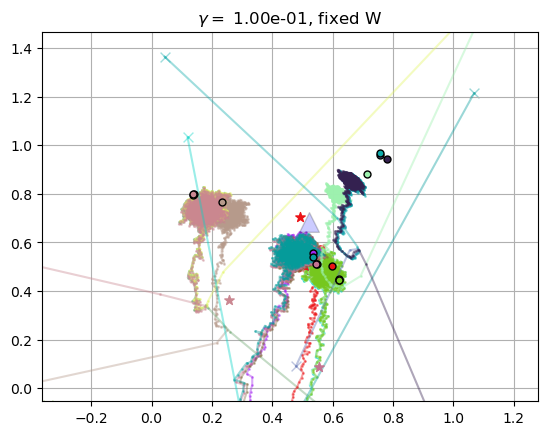

In [4]:
# Ensure output directory exists
output_dir = "res_anim/sto_traj_logistic"
os.makedirs(output_dir, exist_ok=True)

# Set up the figure
fig, ax = plt.subplots()

gamma = 1e-1
dataset.set_gamma(gamma)
dataset.run()

step = 30
count = 1

def update(frame):
    global count

    ax.clear()  # Clear the axes before re-plotting
    dataset.plot_2D(ax=ax, title=rf"$\gamma =$ {gamma:.2e}, fixed W", legend=False, end=step * count)
    count += 1

    # Save the current frame as a PNG
    frame_filename = os.path.join(output_dir, f"frame_{frame}.png")
    fig.savefig(frame_filename, dpi=100)

    return []

# Create animation
ani = FuncAnimation(fig, update, frames=150, blit=False, interval=1)

# Save the animation as a GIF
gif_path = os.path.join(output_dir, "impact_gamma.gif")
ani.save(gif_path, writer="pillow")

plt.show()


## Impact of $\gamma$

In [4]:
# fig, ax = plt.subplots()

# gammas = np.logspace(np.log10(1. / L), -2.8, 100)

# def update(frame):
#     gamma = gammas[frame]
#     dataset.set_gamma(gamma)
#     dataset.run()
#     dataset.plot_2D(ax=ax, title = r"$\gamma =$" + f"{gamma:.2e}, fixed W", legend=False)  # Your function should clear and redraw on the same ax
#     return []

# ani = FuncAnimation(fig, update, frames=len(gammas), blit=False, interval=1)

# # Save the animation as a GIF
# ani.save("impact_gamma.gif", writer="pillow")

# plt.show()


KeyboardInterrupt: 

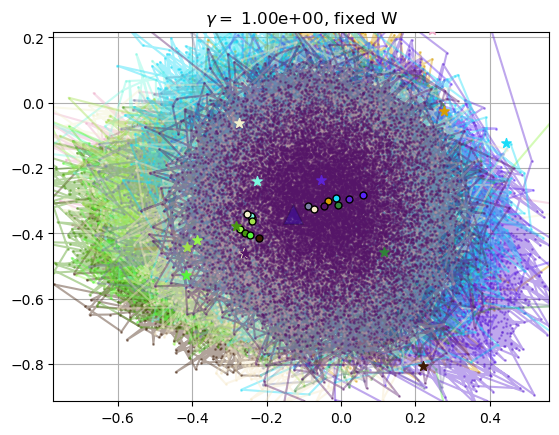

In [5]:
# Ensure output directory exists
output_dir = "res_anim/gamma"
os.makedirs(output_dir, exist_ok=True)

# Set up the figure
fig, ax = plt.subplots()

# Define gamma values
gammas = np.logspace(np.log10(1. / L), -2.8, 100)

def update(frame):
    gamma = gammas[frame]
    dataset.set_gamma(gamma)
    dataset.run()
    
    ax.clear()  # Clear the axes before re-plotting
    dataset.plot_2D(ax=ax, title=rf"$\gamma =$ {gamma:.2e}, fixed W", legend=False)

    # Save the current frame as a PNG
    frame_filename = os.path.join(output_dir, f"frame_{frame}.png")
    fig.savefig(frame_filename, dpi=100)

    return []

# Create animation
ani = FuncAnimation(fig, update, frames=len(gammas), blit=False, interval=1)

# Save the animation as a GIF
gif_path = os.path.join(output_dir, "impact_gamma.gif")
ani.save(gif_path, writer="pillow")

plt.show()


## Impact of $W$

$W$ vs $I$:

In [5]:
# fig, ax = plt.subplots()

# gamma = 1. / (2 * L)

# alphas = np.linspace(0, 0.9, 100)
# alphas = np.concatenate((alphas, np.linspace(0.9, 1, 300)))

# def update(frame):
#     alpha = alphas[frame]
#     dataset.set_W((1 - alpha) * W + alpha * np.eye(m))  # Interpolate between W and the identity matrix
#     dataset.run()
#     dataset.plot_2D(ax=ax, title = r"$(1 - \alpha) W + \alpha I$, $\alpha =$" + f"{alpha:.2f}")  # Your function should clear and redraw on the same ax
#     return []

# ani = FuncAnimation(fig, update, frames=len(alphas), blit=False, interval=50)

# # Save the animation as a GIF
# ani.save("impact_W.gif", writer="pillow")

# plt.show()


$W$ vs $W_{FL}$:

In [6]:
# def plot_W(W, ax=None, structure = None, title = None):
#     # plot m points in 2D, in a circle, edge between i and j thickness proportional to W[i, j]
#     if ax is None:
#         fig, ax = plt.subplots()
#     ax.set_title(title if title is not None else "Communication graph")
#     ax.set_xlim(-1.1, 1.1)
#     ax.set_ylim(-1.1, 1.1)
#     ax.set_aspect('equal')
#     if structure is None:
#         for i in range(W.shape[0]):
#             for j in range(W.shape[1]):
#                 if W[i, j] > 0:
#                     ax.plot([np.cos(i * 2 * np.pi / m), np.cos(j * 2 * np.pi / m)],
#                             [np.sin(i * 2 * np.pi / m), np.sin(j * 2 * np.pi / m)],
#                             linewidth=W[i, j] * 6, color='black')
#         for i in range(W.shape[0]):
#             ax.plot(np.cos(i * 2 * np.pi / m), np.sin(i * 2 * np.pi / m), 'o', color='red' if i not in [m // 2 - 1, m //2] else "blue")
#     elif structure == "Four":
#         size_group = W.shape[0] // 4
#         for i in range(4):
#             center = 0.5 * np.array([np.cos(i * 2 * np.pi / 4), np.sin(i * 2 * np.pi / 4)])
#             size = size_group if i < 3 else W.shape[0] - 3 * size_group
#             for j in range(size):
#                 ax.plot(center[0] + np.cos(j * 2 * np.pi / size) * 0.1,
#                         center[1] + np.sin(j * 2 * np.pi / size) * 0.1, 'o', color= ["red", "blue", "green", "orange"][i])
#         for i in range(W.shape[0]):
#             for j in range(W.shape[1]):
#                 if W[i, j] > 0:
#                     group_i = min(i // size_group, 3)
#                     group_j = min(j // size_group, 3)
#                     center_i = 0.5 * np.array([np.cos(group_i * 2 * np.pi / 4), np.sin(group_i * 2 * np.pi / 4)])
#                     center_j = 0.5 * np.array([np.cos(group_j * 2 * np.pi / 4), np.sin(group_j * 2 * np.pi / 4)])
#                     size_i = size_group if group_i < 3 else W.shape[0] - 3 * size_group
#                     size_j = size_group if group_j < 3 else W.shape[0] - 3 * size_group
#                     ax.plot([center_i[0] + np.cos(i % size_i * 2 * np.pi / size_i) * 0.1,
#                              center_j[0] + np.cos(j % size_j * 2 * np.pi / size_j) * 0.1],
#                             [center_i[1] + np.sin(i % size_i * 2 * np.pi / size_i) * 0.1,
#                              center_j[1] + np.sin(j % size_j * 2 * np.pi / size_j) * 0.1],
#                             linewidth=W[i, j] * 10, color='black')  
#     plt.axis('off')
#     # plt.show()

In [7]:
# W = build_W(m = 16, type="Four", strength=0.0)
# plot_W(W, structure="Four")

In [8]:
# sorted(np.linalg.eigvalsh(W))[-2]

In [9]:
# # 1 row, 2 columns
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# gamma = 1. / (1.5 * L)

# strengths = np.linspace(0, 1., 20)
# alphas = np.concatenate((np.linspace(0, 0.1, 20), np.linspace(0.1, 0.4, 30)))

# W_0 = build_W(m = m, type="Four", strength=0.0)
# W_mid = build_W(m, type="Four", strength=0.01)
# W_FL = build_W(m, type="FL")

# dataset.set_W(W)

# def update(frame):
#     global W
#     if frame < len(strengths):
#         strength = strengths[frame]
#         W = (1 - strength) * W_0 + strength * W_mid  # Interpolate between W_0 and W_mid
#         dataset.set_W(W)
#         dataset.run()
#         second_eigenvalue = sorted(np.linalg.eigvalsh(dataset.W))[-2]
#         dataset.plot_2D(ax=ax[0], title = "Trajectory", delta = .2)
#         plot_W(W, ax=ax[1], structure="Four", title = r"Communication graph, $\lambda_2(W) = $" + f"{second_eigenvalue:.2f}")
#     elif frame < len(strengths) + len(alphas):
#         alpha = alphas[frame - len(strengths)]
#         dataset.set_W((1 - alpha) * W_mid + alpha * W_FL)  # Interpolate between W and the identity matrix
#         dataset.run()
#         second_eigenvalue = sorted(np.linalg.eigvalsh(dataset.W))[-2]
#         dataset.plot_2D(ax=ax[0], title = "Trajectory", delta = .2)
#         plot_W((1 - alpha) * W_mid + alpha * W_FL, ax=ax[1], structure="Four" if len(strengths) > 0 else None, title = r"Communication graph, $\lambda_2(W) = $" + f"{second_eigenvalue:.2f}")

#     return []

# ani = FuncAnimation(fig, update, frames=len(strengths) + len(alphas), blit=False, interval=150)

# # Save the animation as a GIF
# ani.save("impact_W_FL_Four.gif", writer="pillow")


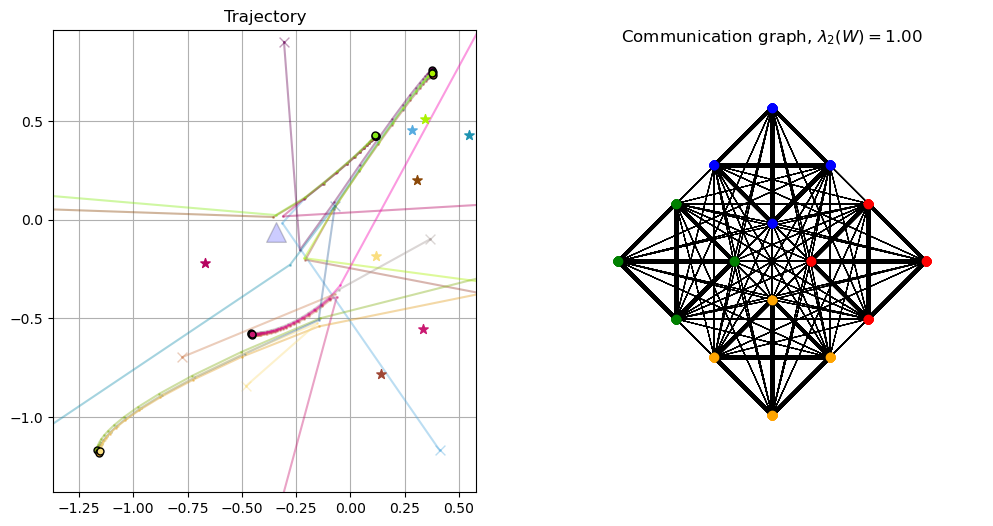

In [14]:
# Ensure output directory exists
output_dir = "res_anim/W"
os.makedirs(output_dir, exist_ok=True)

# 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

gamma = 1. / (1.5 * L)

strengths = np.linspace(1e-2, 1., 20)
alphas = np.concatenate((np.linspace(0, 0.1, 20), np.linspace(0.1, 1.0, 30)))

W_0 = build_W(m=m, type="Four", strength=0.0)
W_mid = build_W(m, type="Four", strength=0.01)
W_FL = build_W(m, type="FL")

dataset.set_W(W_0)

def update(frame):
    global W
    if frame < len(strengths):
        strength = strengths[frame]
        W = (1 - strength) * W_0 + strength * W_mid  # Interpolate between W_0 and W_mid
        dataset.set_W(W)
        dataset.run()
        second_eigenvalue = sorted(np.linalg.eigvalsh(dataset.W))[-2]
        dataset.plot_2D(ax=ax[0], title="Trajectory", delta=.2, legend=False)
        plot_W(W, ax=ax[1], structure="Four", title=rf"Communication graph, $\lambda_2(W) = {second_eigenvalue:.2f}$")
    else:
        alpha = alphas[frame - len(strengths)]
        W_interp = (1 - alpha) * W_mid + alpha * W_FL
        dataset.set_W(W_interp)
        dataset.run()
        second_eigenvalue = sorted(np.linalg.eigvalsh(dataset.W))[-2]
        dataset.plot_2D(ax=ax[0], title="Trajectory", delta=.2, legend=False)
        plot_W(W_interp, ax=ax[1], structure="Four", title=rf"Communication graph, $\lambda_2(W) = {second_eigenvalue:.2f}$")

    # Save current frame as image
    frame_filename = os.path.join(output_dir, f"frame_{frame}.png")
    fig.savefig(frame_filename, dpi=100)

    return []

ani = FuncAnimation(fig, update, frames=len(strengths) + len(alphas), blit=False, interval=150)

# Save the animation as a GIF
gif_path = os.path.join(output_dir, "impact_W_FL_Four.gif")
ani.save(gif_path, writer="pillow")

## Impact of heterogeneity

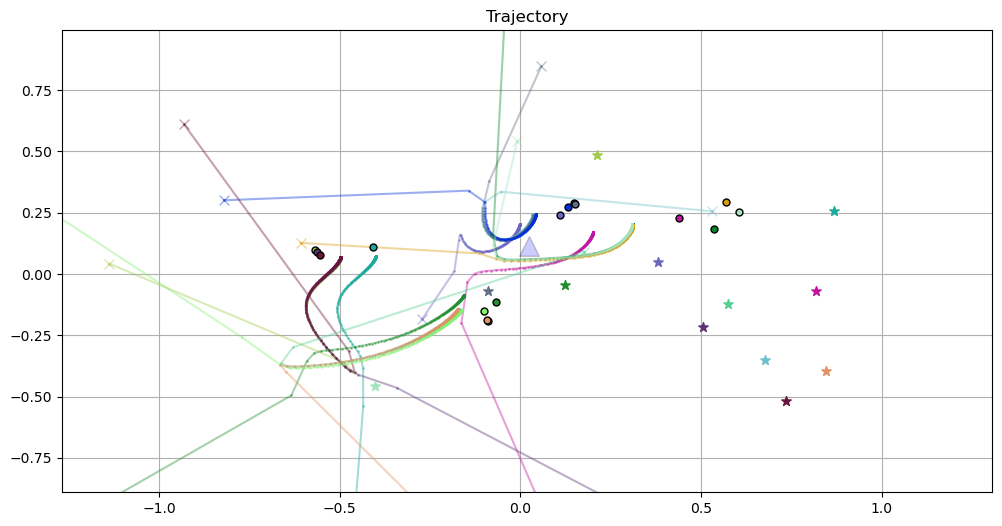

In [ ]:
# Ensure output directory exists
output_dir = "res_anim/heterogeneity"
os.makedirs(output_dir, exist_ok=True)

# 1 row, 2 columns
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

gamma = 1e-1

alphas = np.linspace(0, 1., 100)

W = build_W(m=m, type="Four")

dataset = LogisticDataset(m=m, n=n, d=d, gamma=gamma, W=W, n_iter=20000, L=L, mu=mu)

Theta_loc_0 = dataset.Theta_star_loc.copy()
Theta_loc_0_mean = np.mean(Theta_loc_0, axis=(0, 1))
Theta_loc_0_mean = np.tile(Theta_loc_0_mean, (m, 1, 1))  # Tile to match Theta_loc shape

def update(frame):
    strength = alphas[frame]

    dataset.Theta_star_loc = (1 - strength) * Theta_loc_0 + strength * Theta_loc_0_mean
    dataset.get_lim_star()

    dataset.run()
    dataset.plot_2D(ax=ax, title="Trajectory", delta=.7, legend=False, local = False)

    # Save current frame as image
    frame_filename = os.path.join(output_dir, f"frame_{frame}.png")
    fig.savefig(frame_filename, dpi=100)

    return []

ani = FuncAnimation(fig, update, frames=len(alphas), blit=False, interval=150)

# Save the animation as a GIF
gif_path = os.path.join(output_dir, "impact_heterogeneity.gif")
ani.save(gif_path, writer="pillow")

In [31]:
np.max(abs((l[0] - l[1])))

np.float64(0.14798206500021494)

In [19]:
l[1]

array([-2.43566594, -0.08582373, -2.8451274 , -0.08592233, -3.22439904,
       -0.16075891, -3.22793453, -0.14343374, -1.55997679,  1.10533591,
       -2.01225462,  1.37004595, -2.05905992,  1.29092462, -1.93268983,
        1.23090368, -0.598709  ,  0.39372936, -0.71776456,  0.32316237,
       -0.74132227,  0.34869216, -0.72528499,  0.34450843,  4.29393434,
       -0.03674024,  4.4689657 , -0.34754746,  5.72674424, -0.21336754,
        5.66994262, -0.2190765 ])

In [5]:
n_iter

20000